In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, CategoricalCrossEntropy, Accuracy
from plot import plot_network, plot_metric

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (20,20)

TRAINING_DATASET = "data/mnist/train.csv"
TESTING_DATASET = "data/mnist/test.csv"

def one_hot(y):
    y = y.astype(int)
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size), y.reshape(1, -1)] = 1
    return encoded

def read_mnist(path):
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = one_hot(data[:, 0].reshape(-1, 1))
    return X, Y

def plot_images(X):
    # Disregard elements which would not fit in square
    size = int(len(X)**(1/2))
    x = X[:size**2]
    plt.imshow(np.concatenate(x.reshape(size, size*28, 28), axis=1))
    plt.show()
    
X, Y = read_mnist(TRAINING_DATASET)

train_size = int(len(X)*0.8)

X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

In [2]:
layers = [
    Layer(in_size=28*28, out_size=256, activ_function=ReLU),
    Layer(in_size=256, out_size=10, activ_function=ReLU),
    Layer(in_size=10, out_size=10, activ_function=SoftMax),
]
m = MLP(
    layers=layers,
    loss=CategoricalCrossEntropy,
    metrics=[Accuracy],
    bias=True,
    batch_size=8,
    epochs=10,
    momentum=0.1,
    learning_rate=0.0001,
    verbosity=2,
)

In [ ]:
%%time
stats = m.train(X_train, Y_train, X_test, Y_test)
plot_metric(m.loss, stats, title="Train/Test losses per epoch")
plot_metric(Accuracy(), stats, title="Train/Test accuracy per epoch")

Epoch    1 - train loss  1.269 (std:  4.21) - test loss  1.222 (std:  3.92)


### Let's plot some random images and take a look at input data

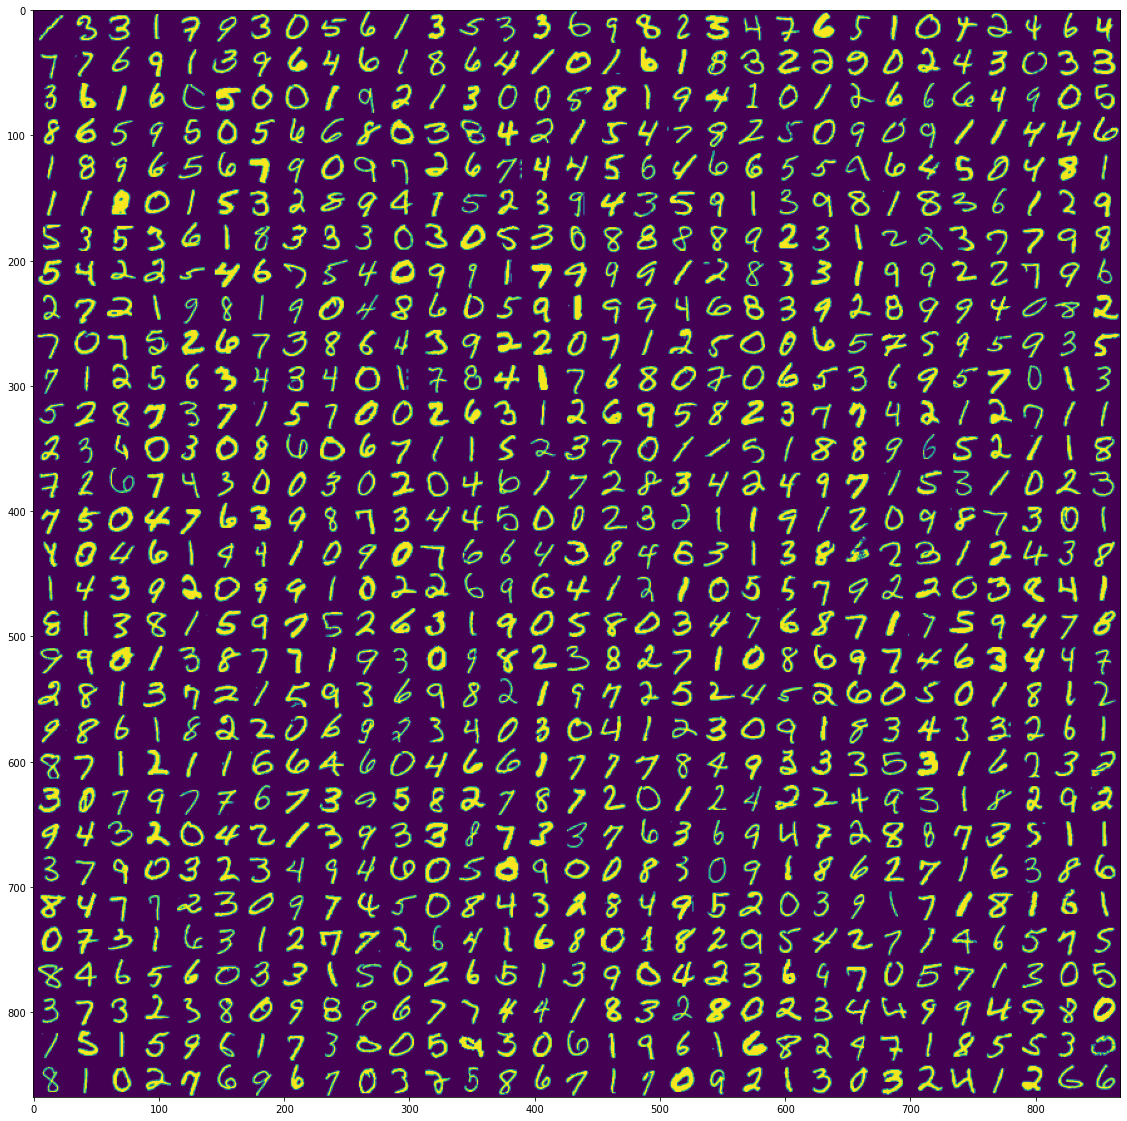

In [10]:
plot_images(X[:1000])